Acquisitioners EDA 

In [1]:
#LIBRARY REFERENCES
import psycopg2
import config as creds
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

In [2]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    #return conn_string
    
    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [3]:
# Connecting to DB
conn, cursor = connect()
#print(cnx_string)

# SQL command to select a feature
feature_sql = """
select * from ml_featureset_2
    """

In [4]:
#read the db values into a dataframe
df = pd.read_sql_query (feature_sql,conn)

D:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df.head()

,tid,unique_award_id,dollars_obligated,naics_code,fiscalyear,contract_name_ru,level_3_cat_delivery,level_3_cat_securitycompliance,level_3_cat_storage,level_3_cat_enduser,...,va05_cell,va06_mcic,va07_dlts,va08_attm,va09_qwes,va10_dellm,va11_other,description_of_requirement,psc_desc,trxyear
0,485984,GS00T07NSD0038HC101318FJ883,807.0,517110.0,2019,EIS,0,0,0,0,...,0,1,0,0,0,0,0,NXEV004629EBM,D304 IT AND TELECOM- TELECOMMUNICATIONS AND TR...,2019
1,486073,GS00T07NSD0038HC101317FD321,112.0,517110.0,2019,EIS,0,0,0,0,...,0,1,0,0,0,0,0,NXEV002851EBM,D322 IT AND TELECOM- INTERNET,2019
2,485935,GS35F0791NN6832216FK016,0.0,443120.0,2016,SCHED70,0,0,0,0,...,0,0,0,0,0,0,1,HP ADP SUPPORT EQUIPMENT CONTRACT MODIFICATION,7035 INFORMATION TECHNOLOGY SUPPORT EQUIPMENT,2016
3,486698,GS00T07NSD0040HC101316FD890,119040.0,517110.0,2017,EIS,0,0,0,0,...,0,0,0,0,1,0,0,IGF::OT::IGF NXDQ 000587,D304 IT AND TELECOM- TELECOMMUNICATIONS AND TR...,2017
4,486701,GS00T07NSD0038HC101315FC684,0.0,517110.0,2019,EIS,0,0,0,0,...,0,1,0,0,0,0,0,NXEV001976EBM,D316 IT AND TELECOM- TELECOMMUNICATIONS NETWOR...,2019


In [6]:
df.columns

Index(['tid', 'unique_award_id', 'dollars_obligated', 'naics_code',
       'fiscalyear', 'contract_name_ru', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award_type',
       'award', 'idv', 'department_name', 'funding_agency_name',
       'funding_cfo_act_agency', 'funding_dod_or_civilian', 'vdo1_booz',
       'vdo2_none', 'vdo3_dfs', 'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi',
       'vdo7_attc', 'vdo8_acct', 'vdo9_srac', 'vd10_ibm', 'vd11_other',
       'va01_none', 'va02_solv', 'va03_cara', 'va04_attc', 'va05_cell',
       'va06_mcic', 'va07_dlts', 'va08_attm', 'va

In [7]:
df.shape

(528640, 57)

In [8]:
#one hot encode the award_type
df.award_type.unique()

array(['C DELIVERY ORDER', 'A BPA CALL', 'B IDC', 'D DEFINITIVE CONTRACT',
       'B PURCHASE ORDER'], dtype=object)

In [9]:
#build a dataframe and list
#https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

ids = df.tid
awa = df.award_type
df_award_type = pd.DataFrame(list(zip(ids, awa)),
                  columns=['Ids', 'awa'])

In [10]:
y = pd.get_dummies(df_award_type, prefix='AT')
print(y.head())

      Ids  AT_A BPA CALL  AT_B IDC  AT_B PURCHASE ORDER  AT_C DELIVERY ORDER  \
0  485984              0         0                    0                    1   
1  486073              0         0                    0                    1   
2  485935              0         0                    0                    1   
3  486698              0         0                    0                    1   
4  486701              0         0                    0                    1   

   AT_D DEFINITIVE CONTRACT  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


In [11]:
df2 = pd.merge(df,y, how='left',left_on=['tid'],right_on=['Ids'])

In [12]:
df2.head()

,tid,unique_award_id,dollars_obligated,naics_code,fiscalyear,contract_name_ru,level_3_cat_delivery,level_3_cat_securitycompliance,level_3_cat_storage,level_3_cat_enduser,...,va11_other,description_of_requirement,psc_desc,trxyear,Ids,AT_A BPA CALL,AT_B IDC,AT_B PURCHASE ORDER,AT_C DELIVERY ORDER,AT_D DEFINITIVE CONTRACT
0,485984,GS00T07NSD0038HC101318FJ883,807.0,517110.0,2019,EIS,0,0,0,0,...,0,NXEV004629EBM,D304 IT AND TELECOM- TELECOMMUNICATIONS AND TR...,2019,485984,0,0,0,1,0
1,486073,GS00T07NSD0038HC101317FD321,112.0,517110.0,2019,EIS,0,0,0,0,...,0,NXEV002851EBM,D322 IT AND TELECOM- INTERNET,2019,486073,0,0,0,1,0
2,485935,GS35F0791NN6832216FK016,0.0,443120.0,2016,SCHED70,0,0,0,0,...,1,HP ADP SUPPORT EQUIPMENT CONTRACT MODIFICATION,7035 INFORMATION TECHNOLOGY SUPPORT EQUIPMENT,2016,485935,0,0,0,1,0
3,486698,GS00T07NSD0040HC101316FD890,119040.0,517110.0,2017,EIS,0,0,0,0,...,0,IGF::OT::IGF NXDQ 000587,D304 IT AND TELECOM- TELECOMMUNICATIONS AND TR...,2017,486698,0,0,0,1,0
4,486701,GS00T07NSD0038HC101315FC684,0.0,517110.0,2019,EIS,0,0,0,0,...,0,NXEV001976EBM,D316 IT AND TELECOM- TELECOMMUNICATIONS NETWOR...,2019,486701,0,0,0,1,0


In [13]:
df3 = df2.drop(['Ids','award_type'], axis=1)

In [14]:
df3.columns

Index(['tid', 'unique_award_id', 'dollars_obligated', 'naics_code',
       'fiscalyear', 'contract_name_ru', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'funding_dod_or_civilian', 'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwes', 'va1

In [16]:
#one hot the contracts
df3.contract_name_ru.unique()

array(['EIS', 'SCHED70', 'STARS8A', 'ALLIANT', 'CONNECTIONS', 'SATCOM',
       'MAS', 'Wireless Mobility Solutions', 'SALESFORCE', 'VETTECHSERV',
       'MILLENIAL'], dtype=object)

In [17]:
ids = df3.tid
cnr = df3.contract_name_ru
df_contract = pd.DataFrame(list(zip(ids, cnr)),
                  columns=['Ids', 'Cnr'])
#break the column out
y = pd.get_dummies(df_contract, prefix='Cnr',dtype=np.int64)
print(y.head())

#join the two dataframes and drop the contract_name_ru column from the result
df4 = pd.merge(df3,y, how='left',left_on=['tid'],right_on=['Ids'])

      Ids  Cnr_ALLIANT  Cnr_CONNECTIONS  Cnr_EIS  Cnr_MAS  Cnr_MILLENIAL  \
0  485984            0                0        1        0              0   
1  486073            0                0        1        0              0   
2  485935            0                0        0        0              0   
3  486698            0                0        1        0              0   
4  486701            0                0        1        0              0   

   Cnr_SALESFORCE  Cnr_SATCOM  Cnr_SCHED70  Cnr_STARS8A  Cnr_VETTECHSERV  \
0               0           0            0            0                0   
1               0           0            0            0                0   
2               0           0            1            0                0   
3               0           0            0            0                0   
4               0           0            0            0                0   

   Cnr_Wireless Mobility Solutions  
0                                0  
1           

In [18]:
df5 = df4.drop(['Ids','tid','contract_name_ru'], axis=1)

In [19]:
df5.columns

Index(['unique_award_id', 'dollars_obligated', 'naics_code', 'fiscalyear',
       'level_3_cat_delivery', 'level_3_cat_securitycompliance',
       'level_3_cat_storage', 'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'funding_dod_or_civilian', 'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwes', 'va10_dellm', 'va11_other',
       'de

In [37]:
#get the null values - no nulls
null_df = df5.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_df[null_df['count']>0])
#print(null_df)

                            count
naics_code                    865
funding_agency_name             3
description_of_requirement    113


In [38]:
#find the min naics code and auto-fill the nulls with a dummy value not in range
print(df5.naics_code.min())

238220.0


In [42]:
df5['naics_code'].fillna(238200,inplace=True)

In [43]:
df5['description_of_requirement'].fillna('', inplace=True)

In [44]:
df5['funding_agency_name'].fillna('', inplace=True)

In [45]:
null_df = df5.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_df[null_df['count']>0])

Empty DataFrame
Columns: [count]
Index: []


In [46]:
df5.columns

Index(['unique_award_id', 'dollars_obligated', 'naics_code', 'fiscalyear',
       'level_3_cat_delivery', 'level_3_cat_securitycompliance',
       'level_3_cat_storage', 'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'funding_dod_or_civilian', 'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwes', 'va10_dellm', 'va11_other',
       'de

In [47]:
#summarize the data by grouping on unique award id and naics code - decrease records
#decrease duplication and create columns containing joined text values

df_summary = df5.groupby(['unique_award_id','naics_code']).agg(lambda x : x.sum() 
                                                                              if x.dtype!='object' else ' '.join(x.unique()))



In [48]:
df_summary.columns

Index(['dollars_obligated', 'fiscalyear', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'funding_dod_or_civilian', 'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwes', 'va10_dellm', 'va11_other',
       'description_of_requirement', 'psc_d

In [49]:
#create a second group to include summary statistics in the analysis
#//stackoverflow.com/questions/12589481/multiple-aggregations-of-the-same-column-using-pandas-groupby-agg/54300159#54300159

df_fy= df.groupby(['unique_award_id','naics_code']).agg(
MinTxYear=pd.NamedAgg(column='trxyear', aggfunc='min')
,MaxTxYear=pd.NamedAgg(column='trxyear', aggfunc='max')
,NumTxYear=pd.NamedAgg(column='trxyear', aggfunc='nunique')
,NumTrx=pd.NamedAgg(column='unique_award_id', aggfunc='count')
)

In [50]:
dfsy = df_fy.join(df_summary, how='left')

In [51]:
dfsy_out = dfsy.drop(['trxyear','fiscalyear'], axis=1)

In [52]:
dfsy_out.head()

,,MinTxYear,MaxTxYear,NumTxYear,NumTrx,dollars_obligated,level_3_cat_delivery,level_3_cat_securitycompliance,level_3_cat_storage,level_3_cat_enduser,level_3_cat_platform,...,Cnr_CONNECTIONS,Cnr_EIS,Cnr_MAS,Cnr_MILLENIAL,Cnr_SALESFORCE,Cnr_SATCOM,Cnr_SCHED70,Cnr_STARS8A,Cnr_VETTECHSERV,Cnr_Wireless Mobility Solutions
unique_award_id,naics_code,,,,,,,,,,,,,,,,,,,,,
05GA0A17A00190001,541511.0,2017,2017,1,1,91021.20,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
05GA0A17A001905GA0A18K0034,541511.0,2018,2019,2,2,72391.24,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
05GA0A17A001905GA0A19K0079,541511.0,2019,2020,2,2,113308.47,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
05GA0A17A002205GA0A17A00220001,334111.0,2017,2017,1,1,31068.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
05GA0A17A003005GA0A17A00300001,541519.0,2017,2017,1,1,312000.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
dfsy_out.shape

(207714, 70)

In [54]:
dfsy_out.columns

Index(['MinTxYear', 'MaxTxYear', 'NumTxYear', 'NumTrx', 'dollars_obligated',
       'level_3_cat_delivery', 'level_3_cat_securitycompliance',
       'level_3_cat_storage', 'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'funding_dod_or_civilian', 'vdo1_booz', 'vdo2_none', 'vdo3_dfs',
       'vdo4_saic', 'vdo5_cara', 'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct',
       'vdo9_srac', 'vd10_ibm', 'vd11_other', 'va01_none', 'va02_solv',
       'va03_cara', 'va04_attc', 'va05_cell', 'va06_mcic', 'va07_dlts',
       'va08_attm', 'va09_qwes', 'va10_dellm', 'va11_other',
       '

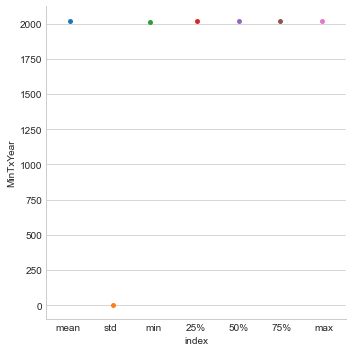

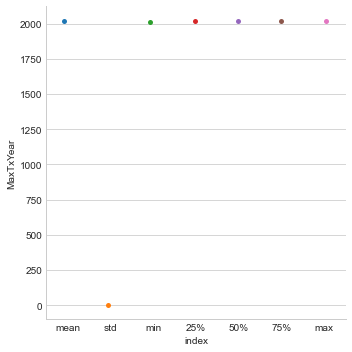

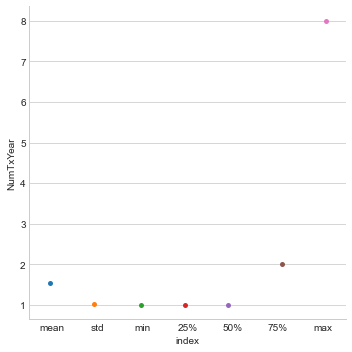

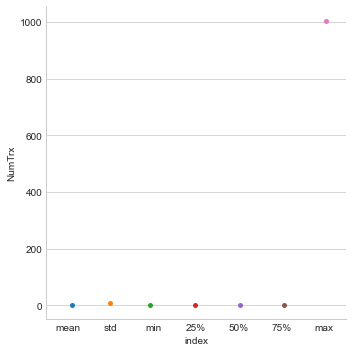

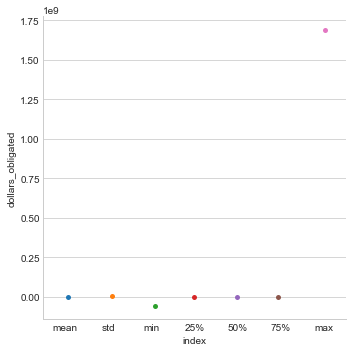

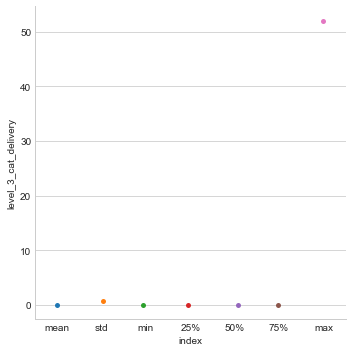

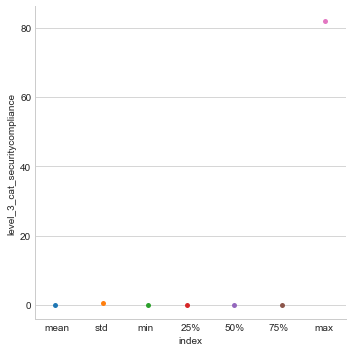

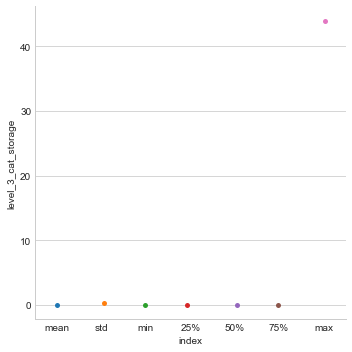

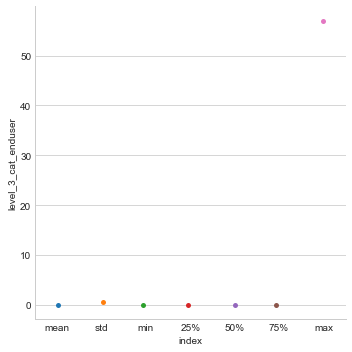

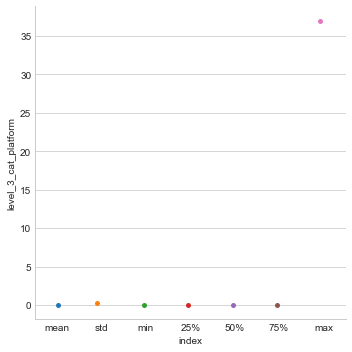

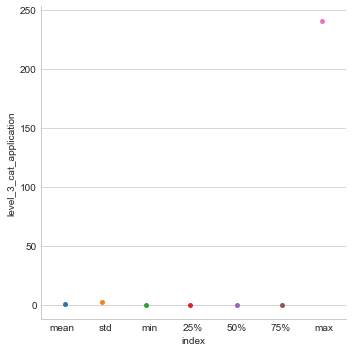

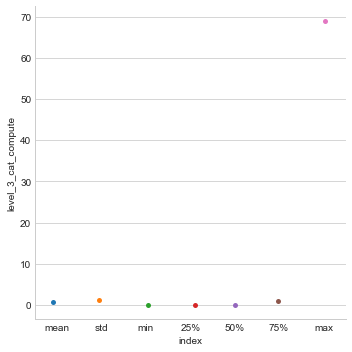

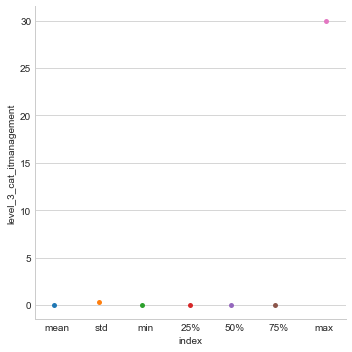

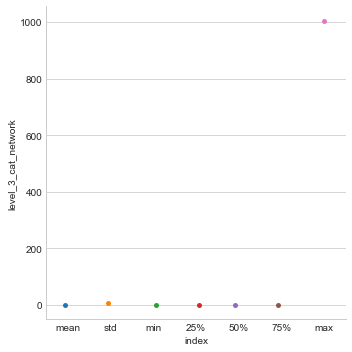

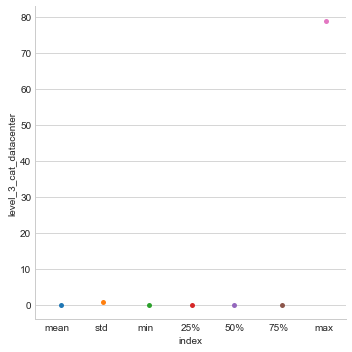

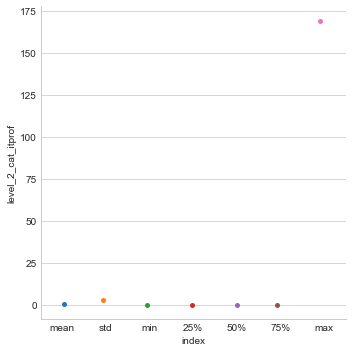

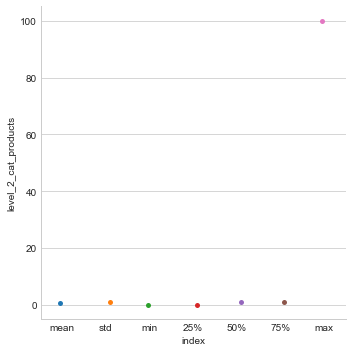

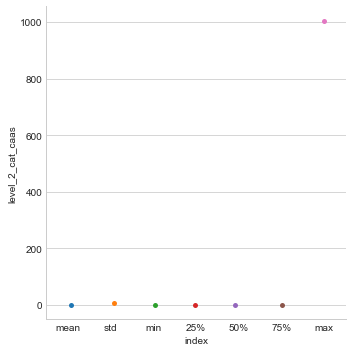

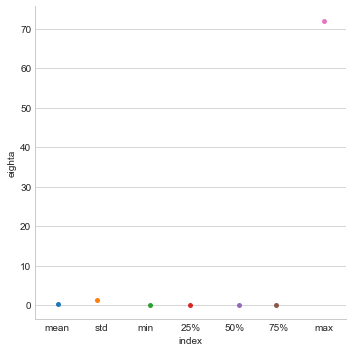

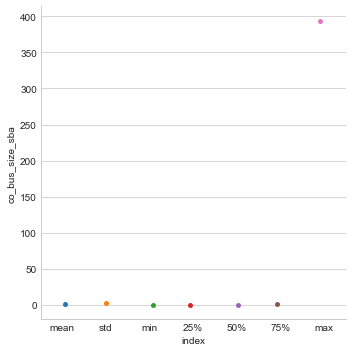

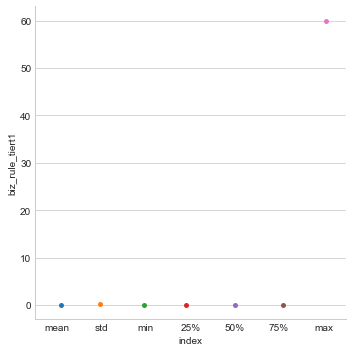

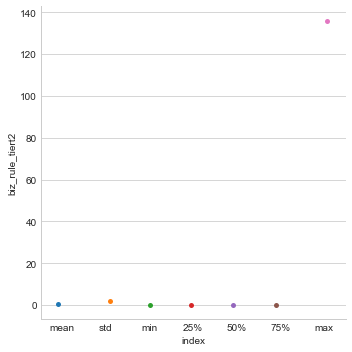

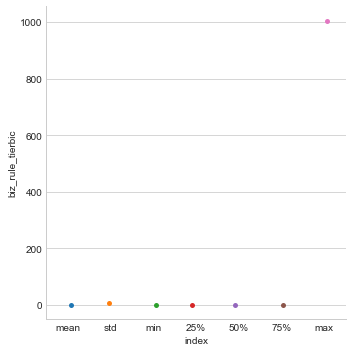

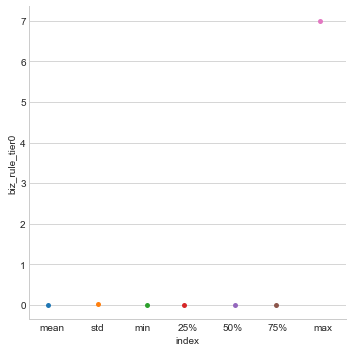

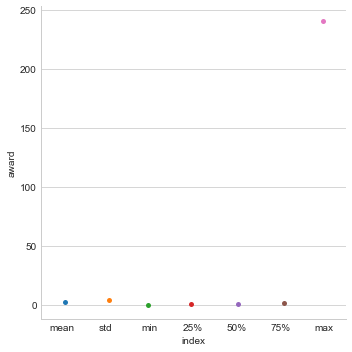

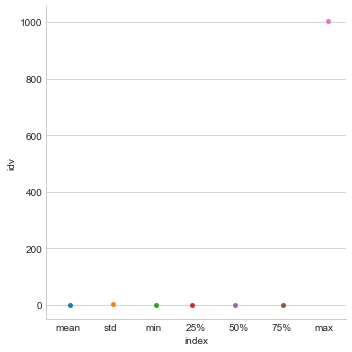

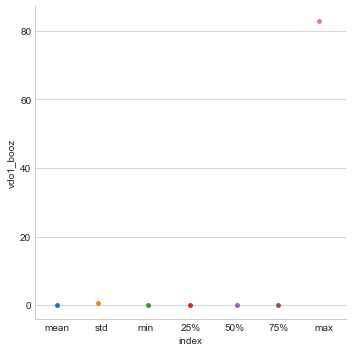

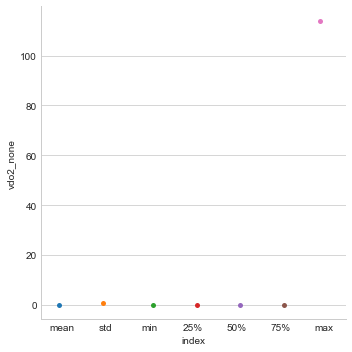

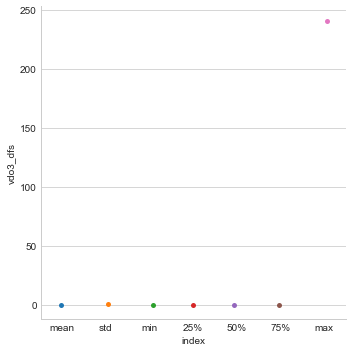

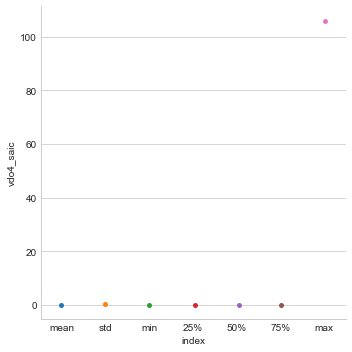

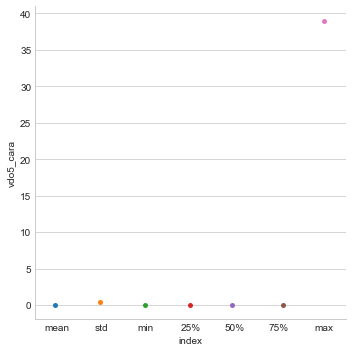

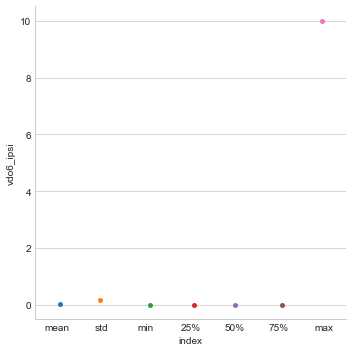

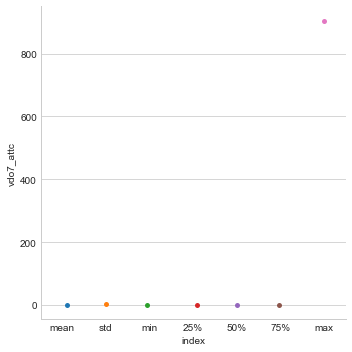

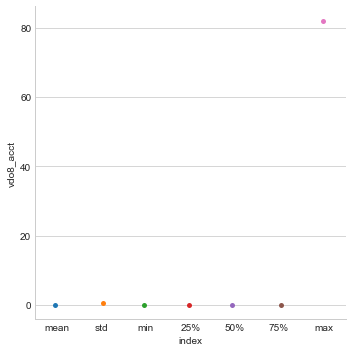

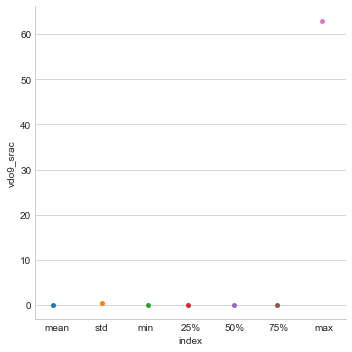

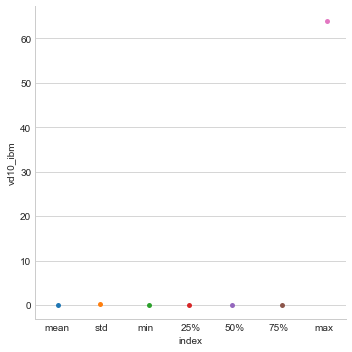

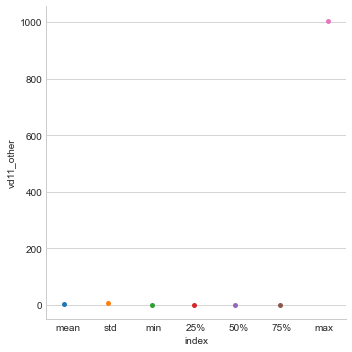

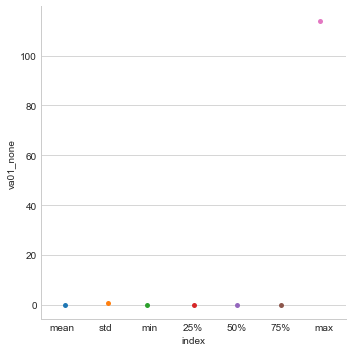

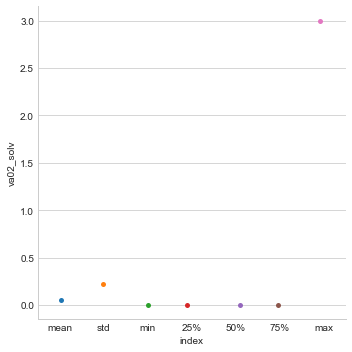

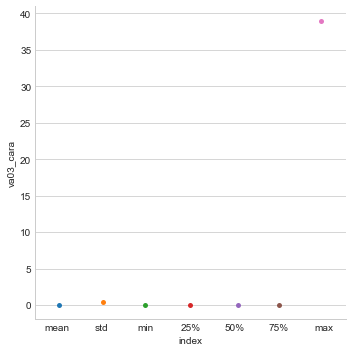

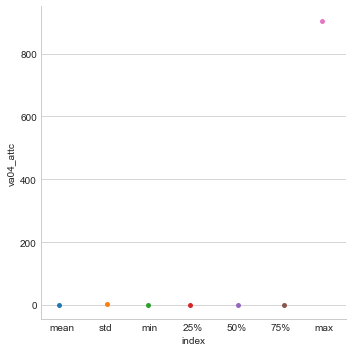

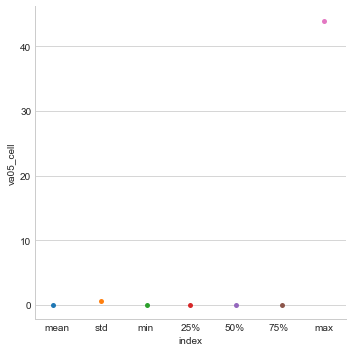

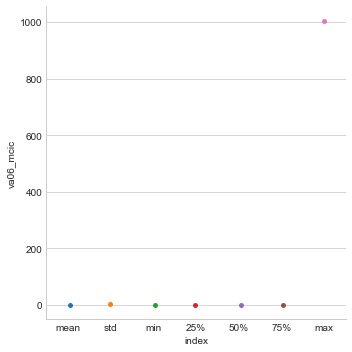

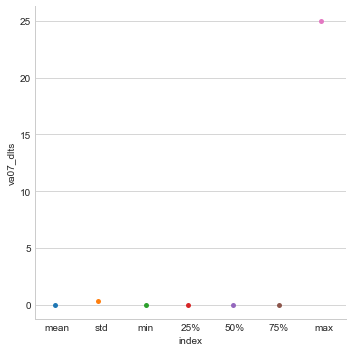

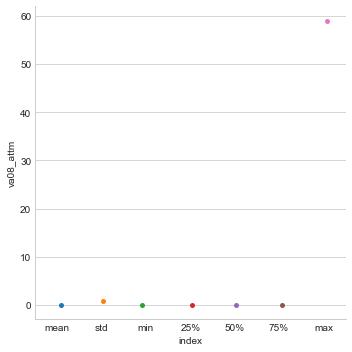

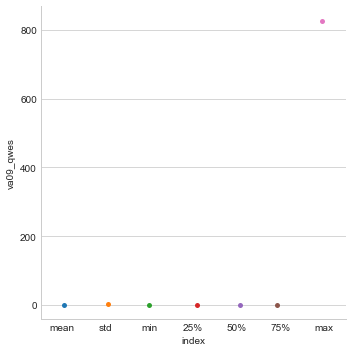

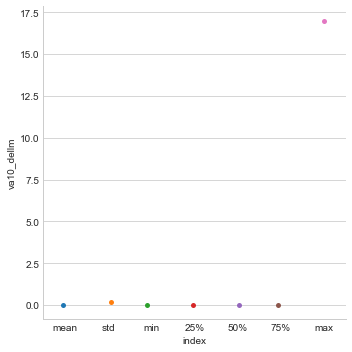

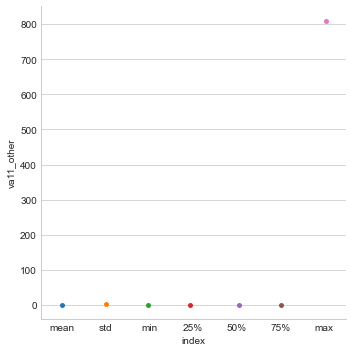

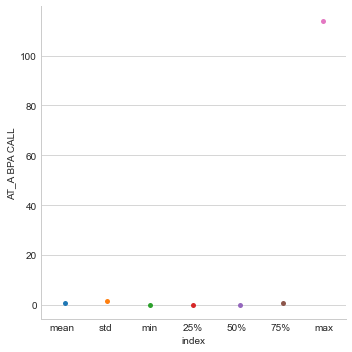

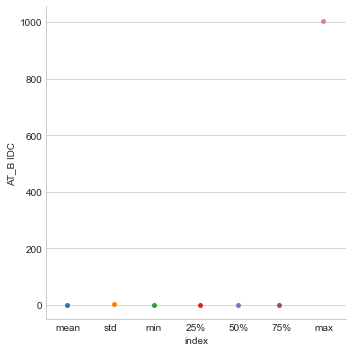

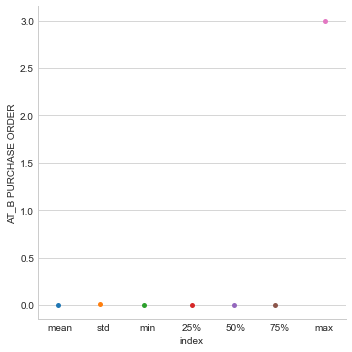

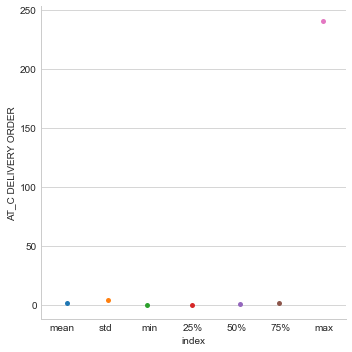

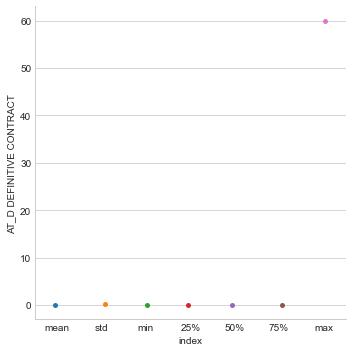

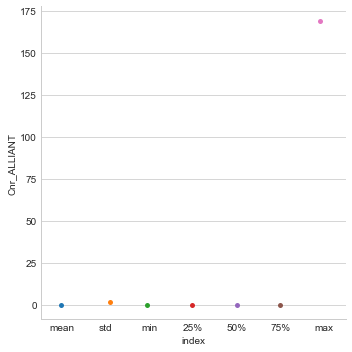

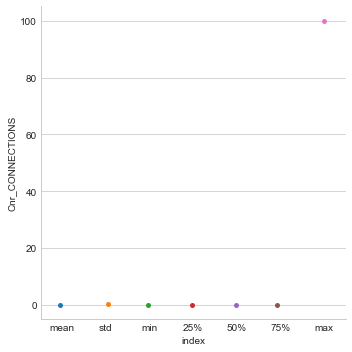

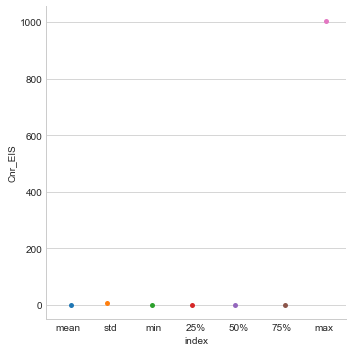

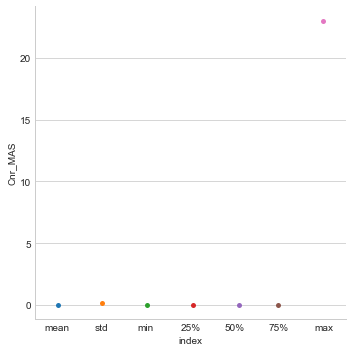

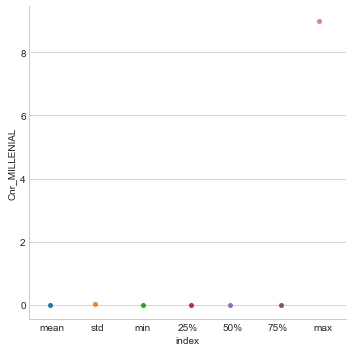

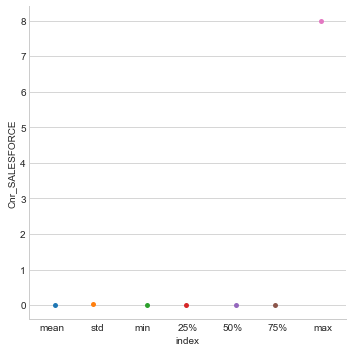

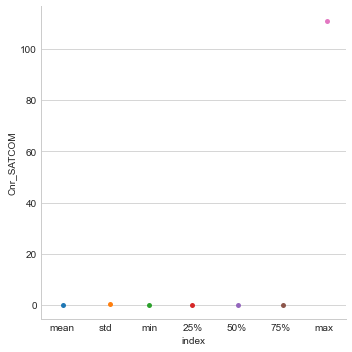

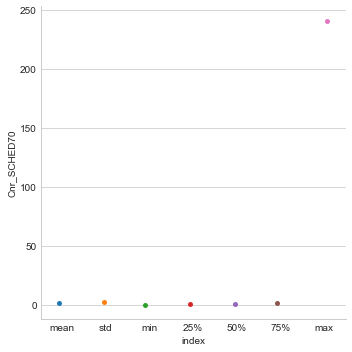

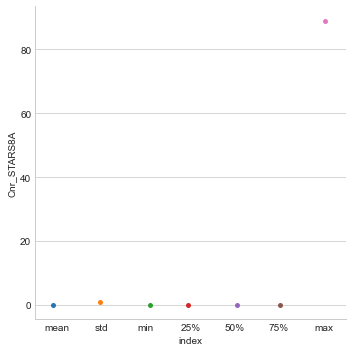

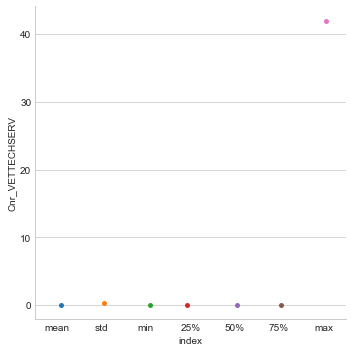

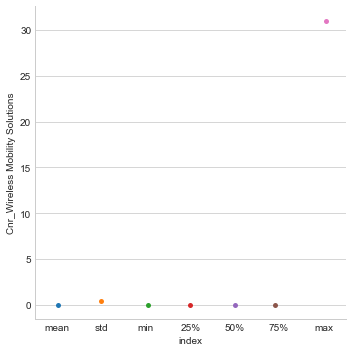

In [55]:
#look at the plot
describe_num_df = dfsy_out.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in describe_num_df:
  if i in ['index']:
    continue
  sns.catplot(x='index', y=i, data=describe_num_df)
  plt.show()

In [56]:
#write out the summary to a csv
#path=r'D:\GT\CAPSTONE\GovtSegment\'
path = 'D:\\GT\\CAPSTONE\\GovtSegment\\'
ofile = 'summary_out_Text3.csv'
dfsy_out.to_csv(path+ofile,chunksize=1000)

In [57]:
# Disconnect from DB
cursor.close()
conn.close()